# Systemy uczące się: Modele generatywne i dyskryminatywne

## Zadanie 1
Zadanie polega na implementacji klasyfikatora naiwnego Bayesa dla zmiennych ciągłych gdzie za rozkłady cechy przyjmij rozkłady normalne.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

Do testowania twojego rozwiązania użyj trzech generatorów danych sztucznych `generate1`, `generate2` oraz `generate3` (funkcje te przyjmują jako argument liczbę elementów do wygenerowania z każdej klasy - domyślnie $N=100$). Sposób ich wywołania jest przedstawiony poniżej:

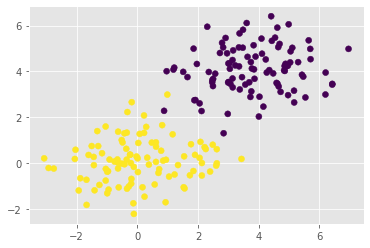

In [2]:
from helpers import generate1, generate2, generate3

X, y = generate1()
plt.scatter(X[:,0], X[:,1], c = y)

W implementacji będzie przydatna klasa `norm` z pakietu `scipy`, która zwraca wartości funkcji gęstości prawdopodobieństwa rozkładu normalnego dla zmiennych ciągłych.

In [3]:
from  scipy.stats import norm

# (X, mean, std)
norm.pdf(5, 0, 1) #gęstość prawd. dla 5 z rozkładu standardowego
norm.logpdf(5, 0, 1) #logarytm gęstości prawd. dla 5 z rozkładu standardowego

-13.418938533204672

Zaimplementuj klasyfikator naiwnego Bayesa dla zmiennych ciągłych. Pamiętaj o zabezpieczniu się przed problemem wynikającym z mnożenia wielu małych liczb (prawdopodobieństw).

In [7]:

class GaussianNaiveBayes():
    def __init__(self):
        self.means = {} 
        # Słownik, który docelowo powinien zawierać tablicę/wektor warunkowych średnich dla każdego atrybutu 
        # Każda tablica/wektor powinna być typu np.array
        # np. 1) means[1] powinno zawierać wektor średnich wartości atrybutów  dla klasy o indeksie 1
        #     2) means[0][1] powinno zawierać średnią 1 atrybutu dla klasy o indeksie 0
        # (Możesz spróbować zaimplementować efektywniejszą implementację używając macierzy)
        self.stds = {} 
        # Analogiczna struktura dla odchyleń standardowych
        self.class_log_prob = None 
        # Wektor zawierający logarytmy prawdopodobieństwa dla każdej z klas 
        # np. class_log_prob[1] zawiera logarytm prawdopodobieństwa, że klasa jest równa 1 P(C=1)
        
    def fit(self, X, y):
        self.classes = range(len(set(y)))
        self.means = [np.mean(X[y == cls,:], axis=0) for cls in self.classes]
        self.stds = [np.std(X[y == cls,:], axis=0) for cls in self.classes]
        self.class_log_prob = np.log([np.mean(y == cls) for cls in self.classes])
        # X jest macierzą gdzie każdy wiersz zawiera kolejną obserwację (typ np.array) 
        # y jest wektorem wartości indeksu klasy (0 lub 1). Jego wartości odpowiadają kolejnym wierszom X
        
    def predict_proba(self, X):
        # Funkcja powinna zwrócić macierz o dwóch kolumnach (dwie klasy) w której kolejne wiersze 
        # zawierają prawdopodobieństwa P(c|x) przynależności dla klas dla kolejnych obserwacji w macierzy X
        P_y, μ, σ, logpdf, (n_rows, n_cols) = self.class_log_prob, self.means, self.stds, norm.logpdf, X.shape
        # log P(k|X) ∝ log P(k) + Σ log P(X|c)
        return np.exp([[sum(logpdf(X[i][j],μ[k][j],σ[k][j]) for j in range(n_cols)) + P_y[k] for k in self.classes] for i in range(n_rows)])
    
    def predict(self, X):
        # Gotowa funkcja wybierająca klasę z największym prawdopodobieństwem
        prob = self.predict_proba(X)
        return np.argmax(prob, axis=1)


Przetestuj twój klasyfikator na wygenerowanych wcześniej danych.

In [8]:
gnb = GaussianNaiveBayes()
gnb.fit(X,y)
#Trafność na zbiorze uczącym
np.mean(gnb.predict(X) == y)


0.985

Narysowanie nauczonego klasyfikatora

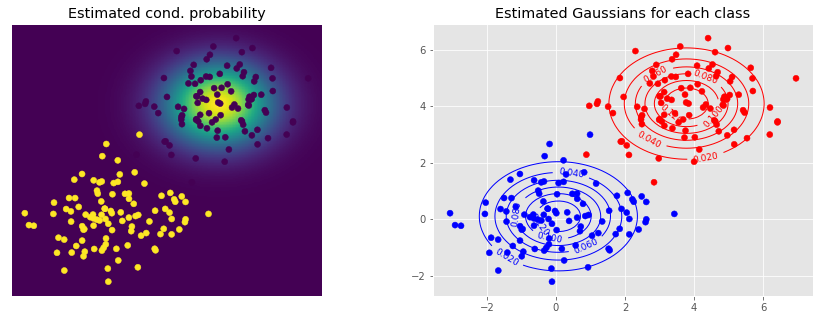

In [9]:
from helpers import plotGaussianBayes
plotGaussianBayes(X, y, gnb)

Użyj funkcji do generowania danych, aby wygenerować zbiór testowy oraz sprawdź na nim trafność klasyfikacji metody.

In [7]:
X_test, y_test = generate1(1000)
np.mean(gnb.predict(X_test) == y_test)

0.991

In [8]:
# Tu będą testy sprawdzarki

**Ćwiczenia**
 - Pamiętaj o przetestowaniu Twojego algorytmu dla wszystkich trzech generatorów danych. W których ze zbiorów założenie o warunkowej niezależności zmiennych jest spełnione? Jak brak spełnienia tego założenia wpływa na działanie klasyfikatora?
 - Z pliku `helpers` zaimportuj klasę `GaussianBayes` (identyczna obsługa jak tej zaimplementowanej przez Ciebie). Klasa implementuje algorytm Bayesa bez założenia o niezależności zmiennych (ale z założeniem o normalności rozkładów). Porównaj wyniki - szczególnie dla zbiorów dla których założenie o warunkowej niezależności zmiennych nie jest spełnione.
 - Klasyfikatora `GaussianBayes` nie można wytrenować na zbiorach które mają mniej niż 3 przykłady dla każdej z klas. Jak myślisz dlaczego? Jak ten problem będzie się zmieniał dla zbiorów o wysokiej liczbie cech?
 - Nawet używając klasyfikatora `GaussianBayes`, który zakłada kompletny model zależności i prawidłowy rozkład danych (nasze dane są generowane z rozkładów normalnych) - często nie jest w stanie uzyskać 100% trafności nawet na zbiorze uczącym. Jak myślisz, dlaczego? 
 - Czy gdyby przepisać do klasyfikatora prawdziwe wartości średnich i macierz wariancji-kowariancji cech (z generatora) - uzyskalibyśmy 100% trafność? Co możemy powiedzieć o takim klasyfikatorze? Czy jest możliwe uzyskanie klasyfikatora bardziej trafnego niż taki? 
 
 Odpowiedzi na dwa ostatnie pytania zostaną sprawdzone: wpisz swoje odpowiedzi poniżej.
 
**Odpowiedzi**
 
4. Klasyfikator Bayesowski zwraca tylko prawdopodobieństwa przynależności do klasy, nawet 99% prawdopodobieństwo przynależności do danej klasy może się okazać mylne. Może się np. zdarzyć, że kilka przykładów jednej klasy będzie wygenerowanych w obszarze, gdzie jest większe prawdopodobieństwo drugiej klasy, co obniży trafność. Granica pomiędzy klasami będzie bardziej rozmyta szczególnie jeśli wartości średnich i odch. std. rozkładów są zbliżone.

5. Nie będzie miał 100% trafności - z powodu w zadaniu 4. generator z niezerowym prawdopodobieństwem może wygenerować nietypowe dla klasy dane. Klasyfikator ze 100% trafnością to klasyfikator doskonały, czyli taki, który nieomylnie przypisuje do każdego przykładu w populacji prawdziwą klasę. Oczywiście nie można uzyskać bardziej trafnego klasyfikatora niż klasyfikator doskonały, natomiast klasyfikator Bayesowski z wiedzą o parametrach procesu generującego dane jest optymalny, czyli mimo niedoskonałości, lepszego nie uzyskamy.

In [246]:
from helpers import GaussianBayes
print('gen', 'clas', 'acc(tr)', 'acc(te)', sep='\t')
for gen_name, gen in [('gen1', generate1), ('gen2', generate2), ('gen3',generate3)]:
    for clas_name, Classifier in [('gnb', GaussianNaiveBayes), ('gb', GaussianBayes)]:
        X_train, y_train = gen()
        X_test, y_test = gen(1000)
        clas = Classifier()
        clas.fit(X_train, y_train)
        train_acc = np.mean(clas.predict(X_train) == y_train)
        test_acc = np.mean(clas.predict(X_test) == y_test)
        print(gen_name, clas_name, train_acc, test_acc, sep='\t')

gen	clas	acc(tr)	acc(te)
gen1	gnb	0.99	0.9925
gen1	gb	0.995	0.994
gen2	gnb	0.995	0.9965
gen2	gb	1.0	1.0
gen3	gnb	0.8	0.8265
gen3	gb	0.975	0.9545


## Zadanie 2
Zaimplementuj algorytm naiwnego Bayesa dla binarnych cech. 

*Wskazówka:* W zależności od Twojej implementacji funkcja `np.nan_to_num` może być przydatna do zabezpieczenia się przed sytuacją mnożenia zerowego prawdopodobienstwa (logarytm 0 na komputerze to $-\infty$) przez zero.

In [14]:
from  scipy.stats import norm
np.seterr(divide='ignore')

def safe_log(x):
    return np.nan_to_num(np.log(x))

def safe_sum(x, **kwargs):
    return np.nan_to_num(np.sum(x, **kwargs))
    
class NaiveBayes():
    def __init__(self):
        self.prob = {}
        # Słownik, który docelowo powinien zawierać tablicę/wektor warunkowych prawdopodobieństw dla każdego atrybutu 
        # Każda tablica/wektor powinna być typu np.array
        # np. 1) prob[2] powinno zawierać wektor prawdopodobieństw o długości równej liczbie atrybutów. 
        #       Każda kolejna wartość wektora to prawdopodobieństwo, że dla klasy o indeksie 2 kolejny atrybut 
        #       przyjmie wartość 1.
        #     2) prob[0][6] powinno zawierać prawdopodobieństwo, że szósty atrybut równa się 1 dla klasy o indeksie 0 
        # (Możesz spróbować zaimplementować efektywniejszą implementację używając macierzy)
        self.class_log_prob = None
        # Wektor zawierający logarytmy prawdopodobieństwa dla każdej z klas 
        # np. class_log_prob[1] zawiera logarytm prawdopodobieństwa, że klasa jest równa 1 P(C=1)
        
    def fit(self, X, y):
        self.classes = range(len(set(y)))
        self.prob = np.array([np.mean(X[y == k,:], axis=0) for k in self.classes])
        self.class_log_prob = safe_log([np.mean(y == k) for k in self.classes])
        
    def predict_proba(self, X):
        P_x, P_k, (n_rows, n_cols) = self.prob, self.class_log_prob, X.shape
        # log P(k|X) ∝ log P(k) + Σ log P(X|k)
        return np.exp([P_k[k] + safe_sum(safe_log(1 - X - P_x[k]), axis=1) for k in self.classes]).T
    
    def predict(self,X):
        prob = self.predict_proba(X)
        return np.argmax(prob, axis=1)

Przetestuj algorytm dla podanych danych. 

In [15]:
nb = NaiveBayes()
X = np.array([[1,1,1], [0,1,1], [0,0,1], [0,0,0]])
y = np.array([1,1,0,0])
nb.fit(X,y)
print(nb.predict(X))
nb.predict_proba(X)

[1 1 0 0]


<ipython-input-14-9c3485656855>:5: RuntimeWarning: invalid value encountered in log
  return np.nan_to_num(np.log(x))
/home/max/.local/opt/miniconda3/envs/ml/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


array([[0.  , 0.5 ],
       [0.  , 0.25],
       [0.5 , 0.  ],
       [0.25, 0.  ]])

In [16]:
# Tu będą testy sprawdzarki

Podejrzyjmy wyestymowane wartości prawdopodobieństw:

In [17]:
nb.prob

array([[0. , 0. , 0.5],
       [0.5, 1. , 1. ]])

Spójrzmy na analogiczną listę estymat dla gotowej implementacji algorytmu `FullBayes` (czyli wersji algorytmu bez założenia o niezależności).

In [18]:
from helpers import FullBayes
fb = FullBayes()
fb.fit(X,y)
fb.prob

{1: {(0, 0, 0): 0,
  (0, 0, 1): 0,
  (0, 1, 0): 0,
  (0, 1, 1): 1,
  (1, 0, 0): 0,
  (1, 0, 1): 0,
  (1, 1, 0): 0,
  (1, 1, 1): 1,
  'suma': 2},
 0: {(0, 0, 0): 1,
  (0, 0, 1): 1,
  (0, 1, 0): 0,
  (0, 1, 1): 0,
  (1, 0, 0): 0,
  (1, 0, 1): 0,
  (1, 1, 0): 0,
  (1, 1, 1): 0,
  'suma': 2}}

Czy coś cię niepokoi w wyświetlonych estymacjach? Jak ten problem będzie się zmieniał w zależności od rozmiaru zbioru i rozmiaru wymiarowości?

## Zadanie 2b
W praktyce klasyfikator Naiwnego Bayesa nadal może słabo działać z powodu zerowych estymat. Zwróć uwagę, że niewidziana nigdy wcześniej wartość cechy w klasie spowoduje wyzerowanie całego prawdopodobieństwa, a nie jedynie jego obniżenie! W przypadku dużej liczby cech i małej liczby przykładów klasy jest spora szansa, że nie wystąpią w danych uczących wszystkie możliwe kombinacje wartości cechy z klasą, więc wystąpienie niewidzianej wartości w danych testowych nie powinno mieć tak silnego wpływu na decyzję.

W związku z tym najczęściej zamiast zwykłego zliczania stosujemy założenie, że każda wartość cechy wystąpiła jednokrotnie zanim jeszcze w ogóle zaczęliśmy zliczać dane z danych uczących (innymi słowy: każda wartość ma sztucznie zwiększoną liczbę wystąpień o 1).
$$P(x_i|y) = \frac{n_{y,x_i} +1 }{n_{y} + |x_i|}$$
gdzie $n_{y,x_i}$ to ile razy wystąpiła wartość cechy $x_i$ w klasie $y$ (zliczanie), $n_{y}$ to liczba przykładów klasy $y$, a $|x_i|$ to liczba możliwych wartości przyjmowanych przez cechę $x_i$ (dla cech binarnych $x_i=2$)


Rozszerz Twój kod o estymowanie prawdopodobieństwa estymatą Laplace'a

In [19]:
class SmoothNaiveBayes(NaiveBayes):     
    def fit(self, X, y):
        self.classes = range(len(set(y)))
        self.prob = np.array([(np.sum(X[y == k,:], axis=0) + 1) / (np.sum(y == k) + 2) for k in self.classes])
        self.class_log_prob = safe_log([np.mean(y == k) for k in self.classes])

Również przetestuj i porównaj uzyskane estymaty z wersją algorytmu bez rozmywania.

In [20]:
snb = SmoothNaiveBayes()
snb.fit(X,y)
print(snb.prob)
snb.predict_proba(X)

[[0.25 0.25 0.5 ]
 [0.5  0.75 0.75]]


<ipython-input-14-9c3485656855>:5: RuntimeWarning: invalid value encountered in log
  return np.nan_to_num(np.log(x))


array([[0.5     , 0.5     ],
       [0.375   , 0.25    ],
       [0.28125 , 0.0625  ],
       [0.140625, 0.015625]])

In [21]:
# Tu będą testy sprawdzarki

Pora na test działania zaimplementowanych metod na większych zbiorach danych. W tym celu użyjemy funkcji `generate_binary`, która generuje sztuczne binarne dane. Jej pierwszym argumentem jest liczba przykładów uczących, a drugim argumentem jest liczba cech $k$. Poniższy kod nie tylko generuje dane, ale także dzieli je na cześć uczącą i testową.

In [255]:
from helpers import generate_binary
Xb, yb = generate_binary(5500, k = 10)
X_train, y_train = Xb[:5000], yb[:5000]
X_test, y_test = Xb[5000:], yb[5000:]

Wytrenuj na tych większych danych zaimplementowane przez ciebie algorytmy `NaiveBayes` i `SmoothNaiveBayes`. Dla każdego klasyfikatora zmierz trafność klasyfikacji i podejrzyj zawartości estymat `print(classifier.prob)`.

In [256]:
# YOUR CODE HERE
for clas_name, Clas in [('nb', NaiveBayes), ('snb', SmoothNaiveBayes)]:
    print(clas_name)
    clas = Clas()
    clas.fit(X_train, y_train)
    Y_train = clas.predict(X_train)
    Y_test = clas.predict(X_test)
    acc_train = np.mean(Y_train == y_train)
    acc_test = np.mean(Y_test == y_test)
    print(f'train acc = {acc_train:.5f}')
    print(f'test acc = {acc_test:.5f}')
    print(clas.prob)
    print()

nb
train acc = 0.98780
test acc = 0.98400
[[0.78183962 0.00982704 0.96698113 0.6466195  0.49449686 0.85888365
  0.54127358 0.99960692 0.76415094 0.90408805]
 [0.96498371 0.04315961 0.96620521 0.62947883 0.52035831 0.41897394
  0.90472313 0.99144951 0.25855049 0.89820847]]

snb
train acc = 0.98780
test acc = 0.98400
[[0.78161822 0.0102121  0.9666143  0.64650432 0.49450118 0.85860173
  0.54124116 0.99921445 0.76394344 0.90377062]
 [0.96460537 0.04353133 0.96582587 0.62937347 0.52034174 0.41903987
  0.90439382 0.99104963 0.25874695 0.89788446]]



<ipython-input-247-9c3485656855>:5: RuntimeWarning: invalid value encountered in log
  return np.nan_to_num(np.log(x))


Ile estymat zawiera klasyfikator "pełny", a ile klasyfikator naiwny? Jak będzie się to zmieniać wraz z rosnącą liczbą wymiarów?

# Zadanie 2c
Zbadajmy zależność pomiędzy trafnością klasyfikacji zaimplementowanych metod przy zmieniającym się rozmiarze zbioru danych. Poniższy kod jest gotowy i początkowo nie musisz w nim nic modyfikować. Oprócz Twoich implementacji testowane są także gotowe metody `FullBayes` i `SmoothFullBayes` z `helpers`, które są pozbawione założenia o niezależności zmiennych.

<ipython-input-247-9c3485656855>:5: RuntimeWarning: invalid value encountered in log
  return np.nan_to_num(np.log(x))
/home/max/Documents/aiaiai/su/2-bayes/helpers.py:65: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= np.sum(probabilities, axis=1, keepdims=True)


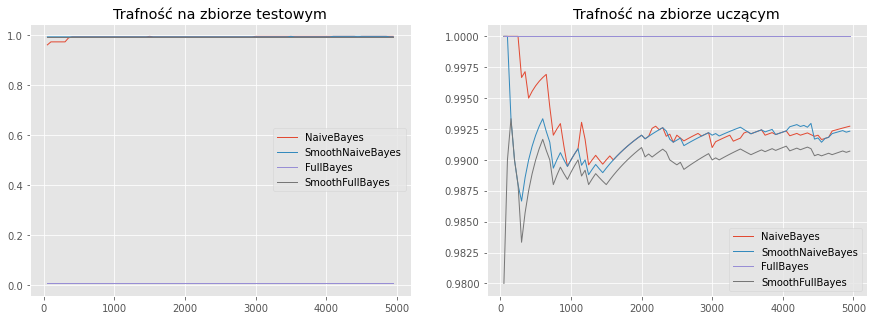

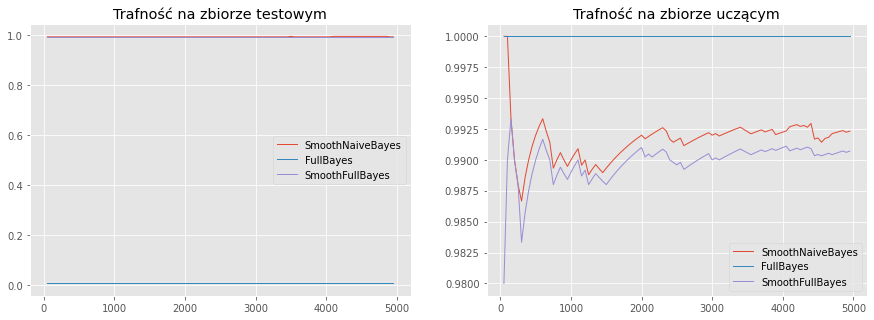

In [257]:
from helpers import SmoothFullBayes, FullBayes, plotAccuracyIterationsPlot
from collections import defaultdict

#Generowanie danych
Xb, yb = generate_binary(5500, k = 50)  # <- Tu kontrolujesz liczbę cech
X_train, y_train = Xb[:5000], yb[:5000]
X_test, y_test = Xb[5000:], yb[5000:]

N = X_train.shape[0]
iterations = range(50,N,50)  # <- Kontrola ewaluowanych punktów (od 50 do N co 50)

results = defaultdict(list)
results_train = defaultdict(list)

for i in iterations:
    for classifier in [NaiveBayes(), SmoothNaiveBayes(), FullBayes(), SmoothFullBayes()]:
        classifier.fit(X_train[:i],y_train[:i])
        results_train[type(classifier).__name__].append(np.mean(classifier.predict(X_train[:i]) == y_train[:i]))
        results[type(classifier).__name__].append(np.mean(classifier.predict(X_test) == y_test))

# Tę ostatnią linijkę możesz chcieć wywoływać w osobnych komórkach, 
# tak aby na koniec porównać wykresy dla kliku ustawień
plotAccuracyIterationsPlot(iterations, results, results_train)
# tworzenie dodatkowego wykresu bez zwykłego NB
del results_train[type(NaiveBayes()).__name__]
del results[type(NaiveBayes()).__name__]
plotAccuracyIterationsPlot(iterations, results, results_train)

Wykonaj ekspermenty dla różnej liczby cech: 2, 10, 100, 500

<ipython-input-216-9c3485656855>:5: RuntimeWarning: invalid value encountered in log
  return np.nan_to_num(np.log(x))


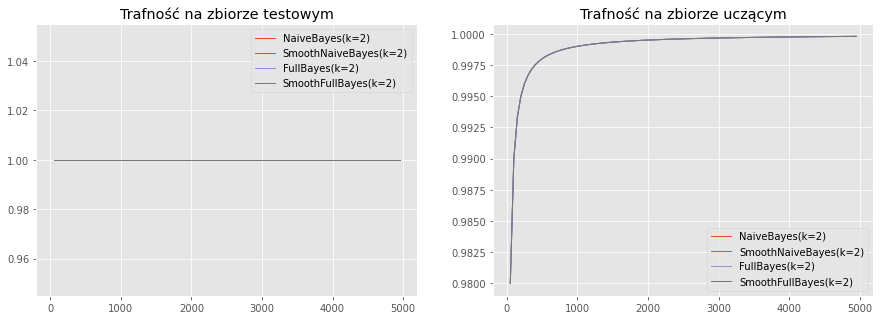

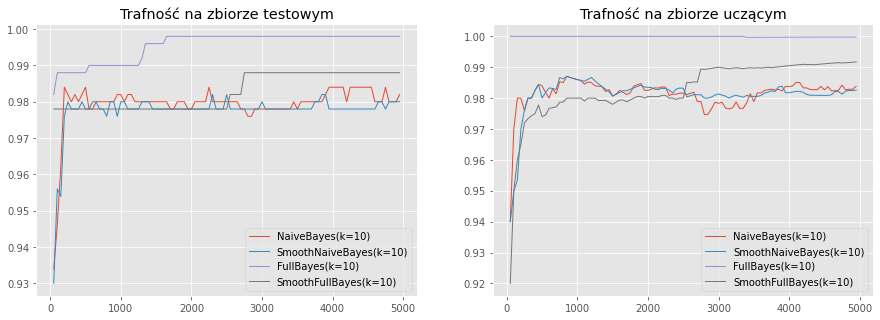

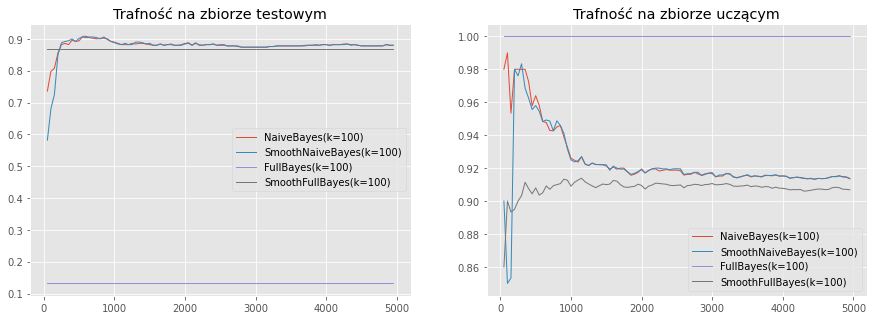

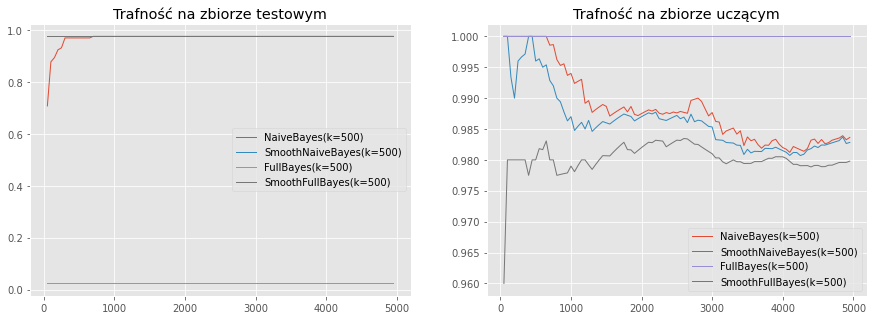

In [237]:
from helpers import plotAccuracyIterationsPlot

n_features = [2, 10, 100, 500]
    
for k in n_features:
    #Generowanie danych
    Xb, yb = generate_binary(5500, k = k)  # <- Tu kontrolujesz liczbę cech
    X_train, y_train = Xb[:5000], yb[:5000]
    X_test, y_test = Xb[5000:], yb[5000:]
    results = defaultdict(list)
    results_train = defaultdict(list)
    for i in iterations:
        for classifier in [NaiveBayes(), SmoothNaiveBayes(), FullBayes(), SmoothFullBayes()]:
            classifier.fit(X_train[:i],y_train[:i])
            results_train[type(classifier).__name__ + f'(k={k})'].append(np.mean(classifier.predict(X_train[:i]) == y_train[:i]))
            results[type(classifier).__name__ + f'(k={k})'].append(np.mean(classifier.predict(X_test) == y_test))
        
    # Tę ostatnią linijkę możesz chcieć wywoływać w osobnych komórkach, 
    # tak aby na koniec porównać wykresy dla kliku ustawień
    plotAccuracyIterationsPlot(iterations, results, results_train)

**Ćwiczenia**

 - Czy rozmywanie ma pozytywne skutki dla klasyfikatora naiwnego? a dla klasyfikatora `FullBayes`?
 - Który klasyfikator z testowanych jest najlepszy w jakich sytuacjach?
 - Jaką trafność  ma klasyfikator `FullBayes` na dostatecznie dużym zbiorze uczączym? W jakich sytuacjach `NaiveBayes` mógłby również osiągnąć 100% na uczącym?
 - Czy jest możliwe, żeby klasyfikator `FullBayes` nie będzie miał 100% trafności (nawet zakładając nieskończenie wielki zbiór danych)?
 - Przeanalizuj wygenerowane wcześniej wykresy określając czy mówimy o przeuczeniu czy niedouczeniu czy ...
 - Czy można w jednym klasyfikatorze Naiwnego Bayesa łączyć cechy ciągłe z dyskretnymi? Dlaczego?
 - W jaki sposób można obejść powyższy problem? Podaj co najmniej dwa sposoby.
 - Klasyfikator naiwny robi założenie o warunkowej niezależności cech. Co mógłbyś zrobić jeżeli spodziewasz się, że pewne pary/grupy cech są zależne i może to mieć duży wpływ na jakość predykcji? Podaj przykład takiej sytuacji.
 
 Odpowiedzi na kropki 3 i 4 oraz 8 zostaną ocenione - wpisz swoją odpowiedź poniżej.

3. 
4. ???
8. 

Ponieważ eksperymenty w tym ćwiczeniu są kosztowne obliczeniowo -- zakomentuj kody generujące wykresy, aby sprawdzarka szybkiej wywołała kod. Z góry dziękuję!

# Zadanie 3
Klasyfikator naiwnego Bayesa często jest używany do klasyfikacji tekstów. Przetestuj działanie algorytmów na podanym rzeczywistym zbiorze danych: 
> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Podany zbiór jest wieloklasowy, więc poniższy kod wybiera z niego podzbiór postów tylko z dwóch tematów.

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [  'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = TfidfVectorizer(binary=True, use_idf=False, norm=None) # Przekształcenie tekstu na cechy binarne
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
vectors = vectors.toarray()
vectors_test = vectors_test.toarray()

Dokumenty w zbiorze można wyświetlić w następujący sposób.

In [10]:
newsgroups_train.data[0:3]

['From: ab@nova.cc.purdue.edu (Allen B)\nSubject: Re: thining algorithm\nOrganization: Purdue University\nLines: 15\n\nIn article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  \n(Kevin Shin) writes:\n> I am trying obtain program to preprocess handwriting characters.\n> Like thining algorithm, graph alogrithm.\n> Do anyone know where I can obtain those?\n\nI usually use "Algorithms for graphics and image processing" by\nTheodosios Pavlidis, but other people here got them same idea and now\n3 of 4 copies in the libraries have been stolen!\n\nAnother reference is "Digital Image Processing" by Gonzalez and\nWintz/Wood, which is widely available but a little expensive ($55\nhere- I just checked today).\n\nab\n',
 "From: stephens@geod.emr.ca (Dave Stephenson)\nSubject: Re: Clementine Science Team Selected\nNntp-Posting-Host: ngis.geod.emr.ca\nOrganization: Dept. of Energy, Mines, and Resources, Ottawa\nLines: 32\n\nnickh@CS.CMU.EDU (Nick Haines) writes:\n\n>In article 

Analogicznie możemy uzyskać dostęp do informacji o klasach.

In [11]:
newsgroups_train.target[0:3]

array([0, 1, 0])

i do "zbinaryzowanego" tekstu

In [12]:
vectors[0:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Wytrenuj klasyfikator Naiwnego Bayesa z rozmywaniem i sprawdż jego trafność na zbiorze uczącym i testowym.
UWAGA: wytrenowany klasyfikator powinien być przypisany do zmiennej `nb` na której `nb.predict()` zostaną wykonane testy

In [25]:
nb = NaiveBayes()
X_tr, y_tr = vectors, newsgroups_train.target
X_te, y_te = vectors_test, newsgroups_test.target
nb.fit(X_tr, y_tr)
Y_tr = nb.predict(X_tr)
Y_te = nb.predict(X_te)
print('train acc =', np.mean(Y_tr == y_tr))
print('test acc =', np.mean(Y_te == y_te))

<ipython-input-14-9c3485656855>:5: RuntimeWarning: invalid value encountered in log
  return np.nan_to_num(np.log(x))


train acc = 1.0
test acc = 0.611749680715198


In [ ]:
# Tu będą testy

**Ćwiczenia**
 - Dlaczego klasyfikator Naiwnego Bayesa dość dobrze sprawdza się do powyższego zadania i analogicznych?
 - Przeanalizuj wartości estymat prawdopodobieństw. Które cechy/słowa są najlepszymi wskaźnikami dla podanych klas? Jakie słowa bardzo słabo wskazują na którąkolwiek z klas?
 - Czy byłoby możliwe wytrenowanie równie skutecznego klasyfikatora z mniejszą liczbą cech? W jaki sposób można by to uzyskać?
 - Analizowany zbiór jest oryginalnie wieloklasowy z tego powodu możemy go wykorzystać do wielu testów wybierając różne pary klas. Pełna lista tematów: 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
 - Czy są pary tematów dla których ten klasyfikator działa znacząco gorzej?
 - Jakie są zalety stosowania klasyfikatora Bayesa dla tego problemu (i w ogólności)? Czy do tego problemu sprawdziłyby się reguły lub drzewa decyzyjne? Dlaczego?
 
 Odpowiedzi na kropki 1, 3 i 6 wpisz poniżej - zostaną sprawdzone.

- 1: ???
- 3: ???
- 6: ???